### Libraries and Data preparation

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
cus=pd.read_csv('Data/customers.csv')
tra=pd.read_csv('Data/transactions.csv')
pro=pd.read_csv('Data/products.csv')

csvs=(cus,tra,pro)

In [81]:
for file in csvs:
    file.info()
    display(file.head(2))
    display(file.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975


client_id    0
sex          0
birth        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     337016 non-null  object
 1   date        337016 non-null  object
 2   session_id  337016 non-null  object
 3   client_id   337016 non-null  object
dtypes: object(4)
memory usage: 10.3+ MB


,id_prod,date,session_id,client_id
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277


id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0


id_prod    0
price      0
categ      0
dtype: int64

## Data Exploration 

### Customers: 

In [82]:
cus.value_counts('sex')

sex
f    4491
m    4132
Name: count, dtype: int64

<Axes: xlabel='birth', ylabel='Count'>

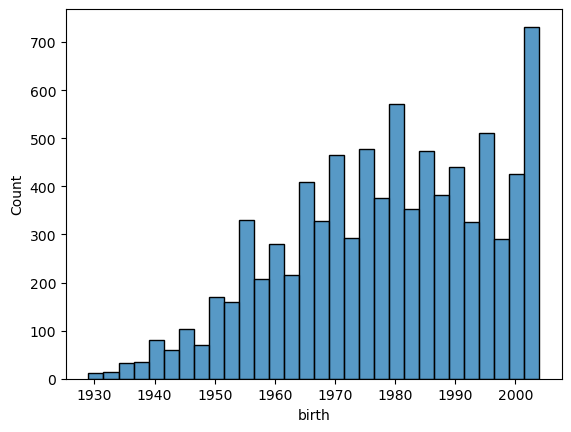

In [83]:
sns.histplot(data=cus, x='birth')

### Products:

In [84]:
pro.value_counts('categ')

categ
0    2309
1     739
2     239
Name: count, dtype: int64

<Axes: xlabel='price', ylabel='Count'>

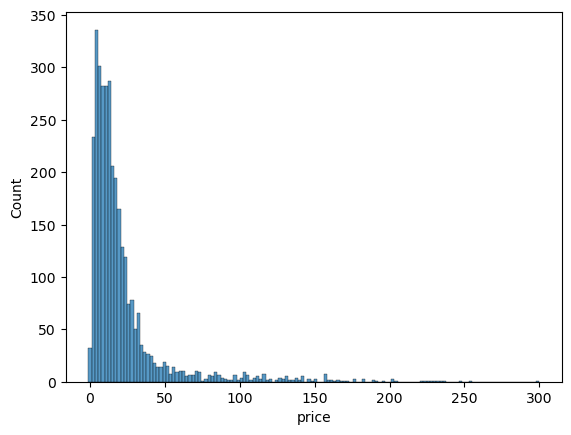

In [85]:
sns.histplot(data=pro, x='price')

Finding test values:

In [86]:
#noticed there are some negative values: 

pro[pro['price']<=0]

,id_prod,price,categ
731,T_0,-1.0,0


### Transactions

In [87]:
#investigating further in transaction dataframe

tra_test = tra[tra['date'].str.startswith('test_')]
display(tra_test)
tra_test['client_id'].unique()

# I will delete these values after merging

,id_prod,date,session_id,client_id
1431,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1
2365,T_0,test_2021-03-01 02:30:02.237446,s_0,ct_1
2895,T_0,test_2021-03-01 02:30:02.237414,s_0,ct_1
5955,T_0,test_2021-03-01 02:30:02.237441,s_0,ct_0
7283,T_0,test_2021-03-01 02:30:02.237434,s_0,ct_1
...,...,...,...,...
332594,T_0,test_2021-03-01 02:30:02.237445,s_0,ct_0
332705,T_0,test_2021-03-01 02:30:02.237423,s_0,ct_1
332730,T_0,test_2021-03-01 02:30:02.237421,s_0,ct_1
333442,T_0,test_2021-03-01 02:30:02.237431,s_0,ct_1


array(['ct_1', 'ct_0'], dtype=object)

## Merging 

In [88]:
# Merged cus with tra on 'client_id'
cus_tra = pd.merge(cus, tra, on='client_id', how='left')

# Merged the resulting dataframe with prod on 'id_prod'
data = pd.merge(cus_tra, pro, on='id_prod', how='left')

data.head()


,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0
1,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0.0
2,c_4410,f,1967,1_312,2022-01-29 14:07:47.482092,s_156960,24.56,1.0
3,c_4410,f,1967,1_653,2021-07-29 23:34:41.866951,s_68860,25.99,1.0
4,c_4410,f,1967,0_1110,2021-11-04 16:28:30.169021,s_114715,4.71,0.0


# Task 1: Data Cleaning   

In [89]:
#excluding the test values from the dataframes

data = data[~(data['id_prod'] == 'T_0')]


In [90]:
#converting date column from object to datetime Dtype

data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S.%f')


## Null Values

In [91]:
display(data.info())
display(data.isnull().sum())
data[data.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
Index: 336837 entries, 0 to 337036
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   336837 non-null  object        
 1   sex         336837 non-null  object        
 2   birth       336837 non-null  int64         
 3   id_prod     336816 non-null  object        
 4   date        336816 non-null  datetime64[ns]
 5   session_id  336816 non-null  object        
 6   price       336713 non-null  float64       
 7   categ       336713 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.1+ MB


None

client_id       0
sex             0
birth           0
id_prod        21
date           21
session_id     21
price         124
categ         124
dtype: int64

,client_id,sex,birth,id_prod,date,session_id,price,categ
2604,c_4505,m,1976,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
2949,c_3468,f,1981,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
6655,c_1403,f,1978,0_2245,2022-02-15 14:26:50.187952,s_165575,NaN,NaN
8374,c_3065,f,1977,0_2245,2022-01-26 13:34:33.440366,s_155484,NaN,NaN
9372,c_7102,m,1983,0_2245,2021-04-25 19:58:42.716401,s_25704,NaN,NaN
...,...,...,...,...,...,...,...,...
328951,c_7416,m,1933,0_2245,2021-11-12 09:25:22.905886,s_118458,NaN,NaN
330503,c_4283,f,1976,0_2245,2021-09-01 02:46:38.931757,s_83377,NaN,NaN
333307,c_6236,f,1976,0_2245,2022-02-25 00:08:08.736068,s_170426,NaN,NaN
333985,c_3526,m,1956,NaN,NaT,NaN,NaN,NaN


There are 21 values missing from the transaction dataframe, and 125 values from the product dataframe.

### Replacing id_product null values

In [92]:
#what are the products that are missing pricing or category data?
data[data[['price', 'categ']].isnull().any(axis=1)]['id_prod'].unique()

array(['0_2245', nan], dtype=object)

So we know that 0_2245 product is missing pricing and category values,and also that there are NaN products missing pricing and category values

In [93]:
#How can we sobstitute the NaN product_id?
#Here I will sobstitute the missing products for the most commonly sold product, 
#and the corresponding pricing, category. 

In [94]:
# and are the pricing and category data always missing if the id_prod is missing?
data[data['id_prod'].isnull()]['categ'].unique()
#seems like yes.

array([nan])

In [95]:
#The values of the most frequent product
most_frequent_values = data[data['id_prod'] == data['id_prod'].mode()[0]].iloc[0]
most_frequent_values
                        

client_id                         c_6616
sex                                    f
birth                               1954
id_prod                            1_369
date          2021-11-06 02:39:18.103498
session_id                      s_115368
price                              23.99
categ                                1.0
Name: 455, dtype: object

In [96]:
# Fill missing 'id_prod' values
data['id_prod'].fillna(most_frequent_values['id_prod'], inplace=True)

In [97]:
# Fill missing 'price' and 'categ' values where id_prod == 1_369

condition = data['id_prod'] == '1_369'

data.loc[condition, 'price'] = data.loc[condition, 'price'].fillna(most_frequent_values['price'])
data.loc[condition, 'categ'] = data.loc[condition, 'categ'].fillna(most_frequent_values['categ'])


In [98]:
#Let's check if the missing values have been filled 
data[data['id_prod']=='1_369'].isnull().sum()

client_id      0
sex            0
birth          0
id_prod        0
date          21
session_id    21
price          0
categ          0
dtype: int64

In [99]:
#Let's check the total remaining NaN values
display(data.isnull().sum())
data[data.isnull().any(axis=1)]
#This seems correct

client_id       0
sex             0
birth           0
id_prod         0
date           21
session_id     21
price         103
categ         103
dtype: int64

,client_id,sex,birth,id_prod,date,session_id,price,categ
2604,c_4505,m,1976,0_2245,2022-01-09 09:23:31.000720,s_147220,NaN,NaN
2949,c_3468,f,1981,0_2245,2021-09-11 10:52:05.205583,s_88251,NaN,NaN
6655,c_1403,f,1978,0_2245,2022-02-15 14:26:50.187952,s_165575,NaN,NaN
8374,c_3065,f,1977,0_2245,2022-01-26 13:34:33.440366,s_155484,NaN,NaN
9372,c_7102,m,1983,0_2245,2021-04-25 19:58:42.716401,s_25704,NaN,NaN
...,...,...,...,...,...,...,...,...
328951,c_7416,m,1933,0_2245,2021-11-12 09:25:22.905886,s_118458,NaN,NaN
330503,c_4283,f,1976,0_2245,2021-09-01 02:46:38.931757,s_83377,NaN,NaN
333307,c_6236,f,1976,0_2245,2022-02-25 00:08:08.736068,s_170426,NaN,NaN
333985,c_3526,m,1956,1_369,NaT,NaN,23.99,1.0


In [100]:
# Now let's see what are the products left with missing values within the price or category columns.
data[data[['price', 'categ']].isnull().any(axis=1)]['id_prod'].unique()

array(['0_2245'], dtype=object)

In [101]:
# Let's see if there are the prices for the product that have missing pricing values
display(data[data['id_prod']=='0_2245']['price'].unique())

#seems like not

array([nan])

So now the only missing pricing and category data is that of product 0_2245

### Replacing 0_2245 product pricing and category values. 

In [102]:
#I noticed the datatype of categ changed to float after the merge
#I will change this after I replace the NaN values
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 336837 entries, 0 to 337036
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   336837 non-null  object        
 1   sex         336837 non-null  object        
 2   birth       336837 non-null  int64         
 3   id_prod     336837 non-null  object        
 4   date        336816 non-null  datetime64[ns]
 5   session_id  336816 non-null  object        
 6   price       336734 non-null  float64       
 7   categ       336734 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 23.1+ MB


None

In [103]:
#I noticed the first value of the id_prod corresponds to the category.
#So we can replace the values in the categ column for 0.
data['categ'].fillna(0.0, inplace = True)

#Lets find out the average price for the category 0 and use that to estimate the price of 0_2245

mean_price_categ_0 = data[data['categ'] == 0.0]['price'].mean(skipna=True)


In [104]:
#Let's replace the NaN values in the price column which all refer to id_prod = 0_2245
data['price'].fillna(mean_price_categ_0, inplace = True)


In [105]:
# Now I can change the categ datatype back to integer
data['categ']= data['categ'].astype(int)

In [106]:
display(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 336837 entries, 0 to 337036
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   client_id   336837 non-null  object        
 1   sex         336837 non-null  object        
 2   birth       336837 non-null  int64         
 3   id_prod     336837 non-null  object        
 4   date        336816 non-null  datetime64[ns]
 5   session_id  336816 non-null  object        
 6   price       336837 non-null  float64       
 7   categ       336837 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 21.8+ MB


None

client_id      0
sex            0
birth          0
id_prod        0
date          21
session_id    21
price          0
categ          0
dtype: int64

Everything seems fine, we have some missing values for the date and session_id but I will ignore those for now.

## Type conversion

The category values have to be converted to strings, since they are not really numberic values.

In [107]:
data['categ'] = data['categ'].astype(str)

## Outliers

I discovered there are some clients who purchase unusually high amounts, so I categorized them as outliers.

In [108]:
data_by_client = data.groupby('client_id')['price'].sum().sort_values(ascending=False)
data_by_client = pd.DataFrame({'client_id': data_by_client.index, 'total_spent': data_by_client.values})
data_by_client.head()

,client_id,total_spent
0,c_1609,162007.340000
1,c_4958,144257.210000
2,c_6714,73218.633656
3,c_3454,54464.213656
4,c_7959,2564.250000


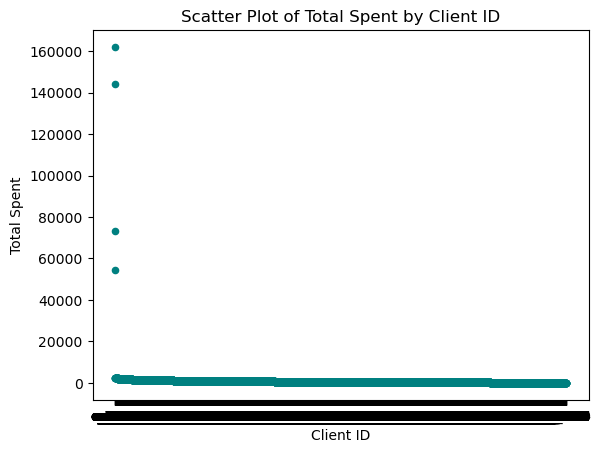

In [109]:
data_by_client.plot(kind='scatter', x='client_id', y='total_spent', color= 'teal')

# Adding labels and title
plt.xlabel('Client ID')
plt.ylabel('Total Spent')
plt.title('Scatter Plot of Total Spent by Client ID')

# Show the plot
plt.show()

There are four clients who spent over 50 thousand. Lets make a list of these clients, and a new dataset which excludes them.

In [110]:
outliers = 'c_1609', 'c_4958', 'c_6714', 'c_3454'
data_outliers= data[data['client_id'].isin(outliers)]

#Let me see their gender and age
data_outliers = data_outliers.groupby('client_id').agg({
    'sex': 'first',
    'birth': 'first'
}).reset_index()
data_outliers['age'] = 2023-data_outliers['birth']
data_outliers

,client_id,sex,birth,age
0,c_1609,m,1980,43
1,c_3454,m,1969,54
2,c_4958,m,1999,24
3,c_6714,f,1968,55


In [111]:
#Creating Data2, dataframe without outliers.
data2 = data[~data['client_id'].isin(outliers)].copy()

I am going to assume that these are some type of re-sellers or partners, and I will exclude them from the rest of the analysis.

In [112]:
#checking if the right amount of clients got deleted
display(data['client_id'].nunique())
data2['client_id'].nunique()

8621

8617

# Saving cleaned data

In [113]:
data.to_csv('Data_Cleaned/data.csv')
data2.to_csv('Data_cleaned/data2.csv', index=False)
